In [408]:
import pandas as pd
import pylab as plt
import seaborn as sns
import datetime
%matplotlib inline

In [ ]:
# generate emissions for BOMXMOX
isop_em=pd.read_csv('/Users/ptg21/Dropbox/projects/boxmox/bin/pbl_diurnal_cycle/Emissions.csv',delim_whitespace=True,skiprows=3)
new_isop=isop_em[['times','ISOP','NO']].copy()

new_isop['NO']=new_isop['NO']*0.15
new_isop['ISOP']=new_isop['ISOP']*25

new_isop['ISOP'][(new_isop['times']<6.5) | (new_isop['times']>11)] = 0
#new_isop['NO'][(new_isop['times']<8.5) | (new_isop['times']>18)] = 0
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('ISOPRENE EMISS / mol cm-2 s-1', fontsize=14)
new_isop['ISOP'].plot()
plt.subplot(1,2,2)
plt.title('NO EMISSS / mol cm-2 s-1', fontsize=14)
new_isop['NO'].plot()
plt.tight_layout()
new_isop.to_csv('/Users/ptg21/Dropbox/projects/boxmox/bin/pbl_isoprene/Emissions.csv.new')

PLOT MODEL DATA

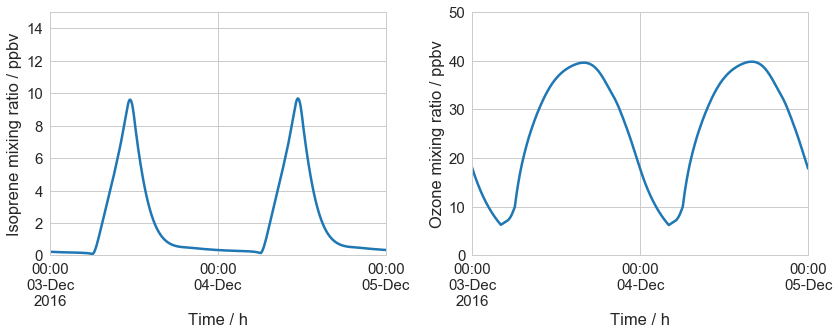

In [531]:
data=pd.read_csv('/Users/ptg21/Dropbox/projects/boxmox/bin/pbl_isoprene/MOZART_4.conc',delim_whitespace=True)
data['time']= data['time']*3600.0
data['time'] = pd.to_datetime(data['time'] , unit='s',)
data['time'] = data['time'] + + datetime.timedelta(days=17136)
data=data.set_index(['time'])

plt.figure(figsize=(12,5))
sns.set_style(style='whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

plt.subplot(1,2,1)
ax=(data['ISOP']/1e-3).plot()
ax.set_xlim(pd.Timestamp('2016-12-03 00:00'), pd.Timestamp('2016-12-05'))
plt.ylabel('Isoprene mixing ratio / ppbv')
plt.xlabel('Time / h')
plt.ylim(0,15)
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

plt.subplot(1,2,2)
ax=(data['O3']/1e-3).plot()
ax.set_xlim(pd.Timestamp('2016-12-03 00:00'), pd.Timestamp('2016-12-05'))
plt.xlabel('Time / h')
plt.ylabel('Ozone mixing ratio / ppbv')
plt.ylim(0,50)
import matplotlib.dates as dates
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))
plt.tight_layout()

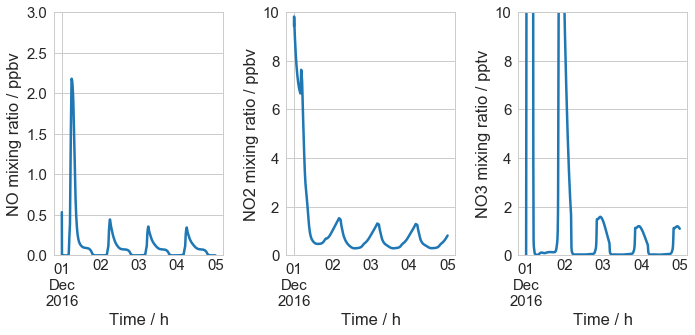

In [537]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
ax=(data['NO']/1e-3).plot()
#ax.set_xlim(pd.Timestamp('1970-01-01'), pd.Timestamp('1970-01-05'))
plt.ylabel('NO mixing ratio / ppbv')
plt.xlabel('Time / h')
plt.ylim(0,3)

plt.subplot(1,3,2)
(data['NO2']/1e-3).plot()
#ax.set_xlim(pd.Timestamp('1970-01-01'), pd.Timestamp('1970-01-02'))
plt.xlabel('Time / h')
plt.ylabel('NO2 mixing ratio / ppbv')
plt.ylim(0,10)

plt.subplot(1,3,3)
(data['NO3']/1e-6).plot()
#ax.set_xlim(pd.Timestamp('1970-01-01'), pd.Timestamp('1970-01-02'))
plt.xlabel('Time / h')
plt.ylabel('NO3 mixing ratio / pptv')
plt.ylim(0,10)
plt.tight_layout()

QUICK COMP BETWEEN BOXMOX JRATES AND TUV OUTPUT

In [516]:
jrates=pd.read_csv('/Users/ptg21/Dropbox/projects/boxmox/bin/pbl_diurnal_cycle/PhotolysisRates.csv',delim_whitespace=True,skiprows=3)

In [123]:
# August JNO2 data from TUV
import numpy as np
tuv_output=np.array([ 0.000E+00,  0.000E+00,  0.000E+00,  0.000E+00,  0.000E+00,  0.000E+00,  6.130E-04,\
                     4.399E-03,  7.852E-03,  9.909E-03,  1.102E-02,  1.151E-02, 1.157E-02,  1.124E-02,\
                     1.038E-02,  8.699E-03,  5.756E-03,  1.640E-03,  7.836E-07,  0.000E+00,  0.000E+00,\
                     0.000E+00,  0.000E+00,  0.000E+00])

In [124]:
# December JNO2 data from TUV
tuv_output = np.array([0.000E+00,  0.000E+00,  0.000E+00,  0.000E+00,  0.000E+00,  0.000E+00,  9.996E-05,\
                       2.785E-03,  6.566E-03,  9.047E-03,  1.042E-02,  1.104E-02,  1.110E-02,  1.058E-02,\
                       9.363E-03,  7.107E-03,  3.518E-03,  3.170E-04,  0.000E+00,  0.000E+00,  0.000E+00,\
                       0.000E+00,  0.000E+00,  0.000E+00])

(0, 0.012)

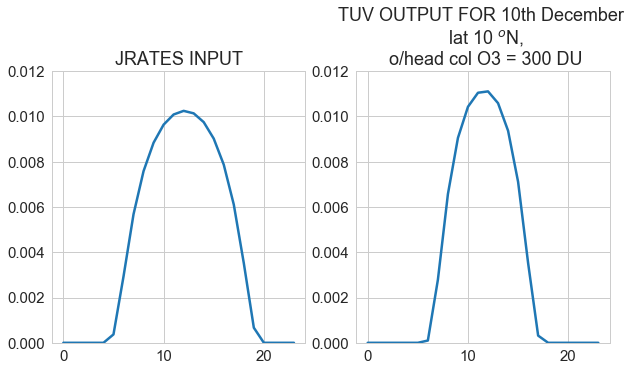

In [125]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
jrates['no2'].plot()
plt.ylim(0,1.2e-2)
plt.title('JRATES INPUT')
plt.subplot(1,2,2)
plt.plot(tuv_output)
plt.title('TUV OUTPUT FOR 10th December \n lat 10 $^o$N,\n o/head col O3 = 300 DU')
plt.ylim(0,1.2e-2)


QUICK LOOK AT THE OBS DATA

In [193]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M')
met_data = pd.read_csv('data/weather station aspa jan2015-12jan20172.csv',date_parser=dateparse)
met_data = met_data.set_index(['TIMESTAMP'])
met_data.index=pd.to_datetime(met_data.index, format='%d/%m/%Y %H:%M')

In [379]:
o3=pd.read_csv('data/O3_OilPalm_dec16.csv',date_parser=dateparse)
o3=o3.set_index(['Date:Time'])
o3obs = o3['Ozone mixing ratio']
o3obs.index=pd.to_datetime(o3obs.index, format='%d/%m/%Y %H:%M')
o3obs=pd.DataFrame(o3obs)

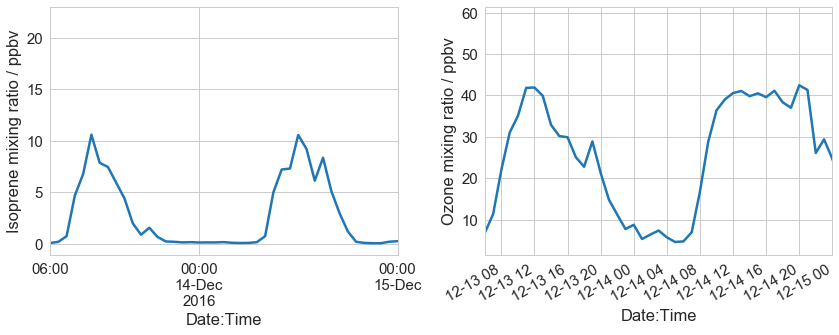

In [532]:
plt.figure(figsize=(12,5))
ob3obs=o3obs.resample('H').mean()
dec_isop=dec_isop.resample('H').mean()

plt.subplot(1,2,2)
ax=o3obs['Ozone mixing ratio'].plot()
ax.set_xlim(pd.Timestamp('2016-12-13 06:00'), pd.Timestamp('2016-12-15'))
plt.ylabel('Ozone mixing ratio / ppbv')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=2))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

plt.subplot(1,2,1)
ax=dec_isop['Isoprene mixing ratio'].plot()
ax.set_xlim(pd.Timestamp('2016-12-13 06:00'), pd.Timestamp('2016-12-15'))
plt.ylabel('Isoprene mixing ratio / ppbv')
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
                                                interval=2))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))
plt.tight_layout()

In [356]:
jan=pd.read_csv('data/Isoprene_OilPalm_jan16.csv',date_parser=dateparse)
jan=jan.set_index(['Date:Time'])
jan_isop = jan['Isoprene mixing ratio']
jan_isop.index=pd.to_datetime(jan_isop.index, format='%d/%m/%Y %H:%M')
jan_isop=pd.DataFrame(jan_isop)
dec=pd.read_csv('data/Isoprene_OilPalm_dec16.csv',date_parser=dateparse)
dec=dec.set_index(['Date:Time'])
dec_isop = dec['Isoprene mixing ratio']
dec_isop.index=pd.to_datetime(dec_isop.index, format='%d/%m/%Y %H:%M')
dec_isop=pd.DataFrame(dec_isop)
obs=pd.concat([dec_isop,jan_isop])
obs=pd.DataFrame(obs)

In [373]:
all=pd.merge_asof(dec_isop, o3obs, left_index=True, right_index=True)

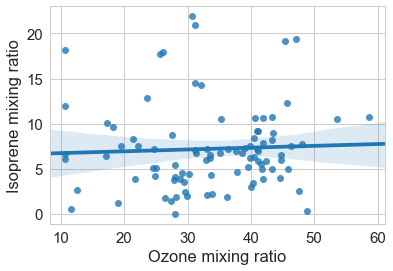

In [388]:
sns.regplot(all['Ozone mixing ratio'].between_time('10:00','16:00'), all['Isoprene mixing ratio'].between_time('10:00','16:00'), )

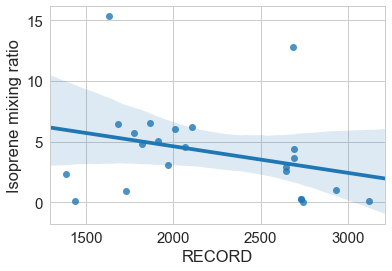

In [270]:
sns.regplot(obs2['RECORD'].between_time('12:00','18:00'), obs2['Isoprene mixing ratio'].between_time('12:00','18:00'))

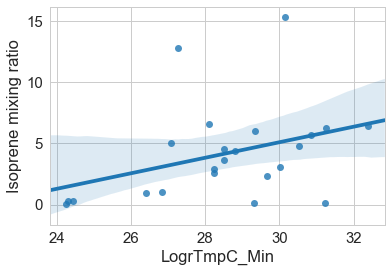

In [239]:

sns.regplot(obs2['LogrTmpC_Min'].between_time('12:00','18:00'), obs2['Isoprene mixing ratio'].between_time('12:00','18:00'))

(0, 12)

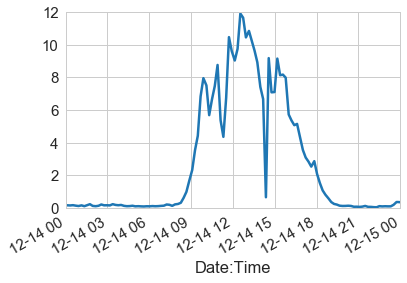

In [178]:
ax=obs['Isoprene mixing ratio'].plot()

ax.set_xlim(pd.Timestamp('2016-12-14'), pd.Timestamp('2016-12-15'))
ax.set_ylim(0,12)

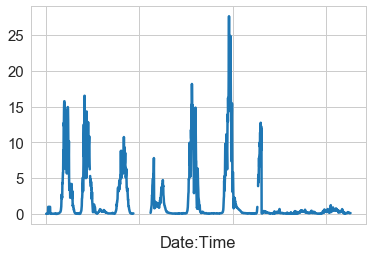

In [171]:
jan_isop['Isoprene mixing ratio'].plot()

(0, 10)

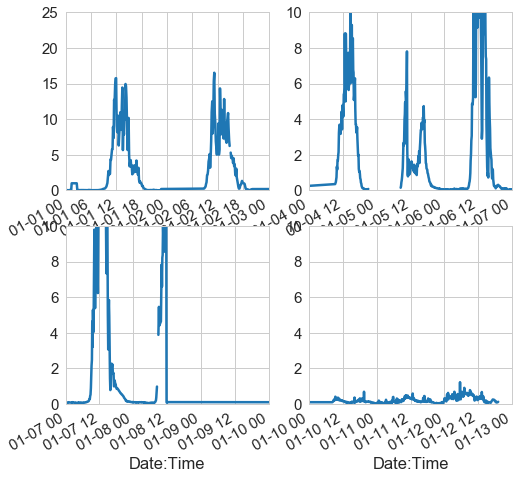

In [136]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
ax=jan_isop['Isoprene mixing ratio'].plot()
ax.set_xlim(pd.Timestamp('2017-01-01'), pd.Timestamp('2017-01-03'))
ax.set_ylim([0,25])
plt.subplot(2,2,2)
ax=jan_isop['Isoprene mixing ratio'].plot()
ax.set_xlim(pd.Timestamp('2017-01-04'), pd.Timestamp('2017-01-07'))
ax.set_ylim([0,10])
plt.subplot(2,2,3)
ax=jan_isop['Isoprene mixing ratio'].plot()
ax.set_xlim(pd.Timestamp('2017-01-07'), pd.Timestamp('2017-01-10'))
ax.set_ylim([0,10])
plt.subplot(2,2,4)
ax=jan_isop['Isoprene mixing ratio'].plot()
ax.set_xlim(pd.Timestamp('2017-01-10'), pd.Timestamp('2017-01-13'))
ax.set_ylim([0,10])